CASE -

In this case we need to predict the amount of calories burnt by a person after doing excercise based on certain parameters.

WORK FLOW -

Data

Data Pre Processing

Data Analysis

Train Test Split

XGBoost Regressor

Model Evaluation

Predictive System

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Data Collection & Processing

In [2]:
# Importing dataset

exercise = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Calories Burnt Prediction Using XGBRegressor\exercise.csv')
calories = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Calories Burnt Prediction Using XGBRegressor\calories.csv')

Combining Two DataFrames

In [3]:
data = pd.concat([exercise, calories['Calories']], axis = 1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
# Checking number of rows & column

data.shape

(15000, 9)

In [5]:
# Getting information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
# Checking missing values

data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [7]:
# Statistical measures of data

data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualisation

In [8]:
# For getting some basic themes for plot

sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

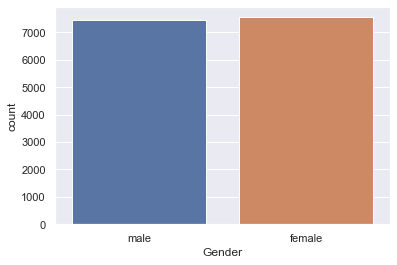

In [9]:
# Plotting Count of 'Gender' variable

sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

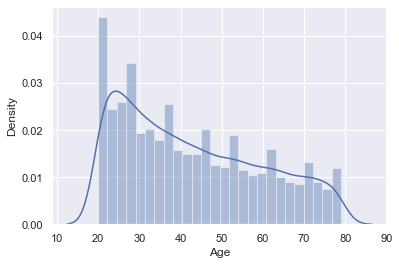

In [10]:
# PLotting distribution of 'Age' column

sns.distplot(data['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

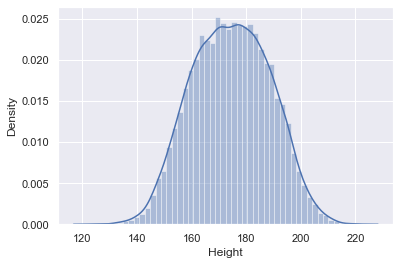

In [11]:
# PLotting distribution of 'Height' column

sns.distplot(data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

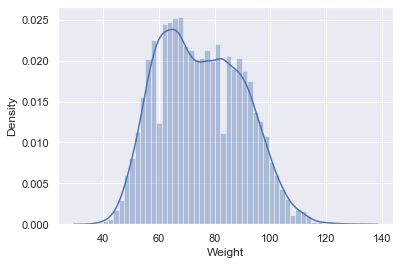

In [12]:
# PLotting distribution of 'Weight' column

sns.distplot(data['Weight'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

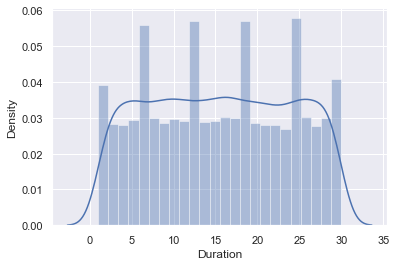

In [13]:
# PLotting distribution of 'Duration' column

sns.distplot(data['Duration'])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

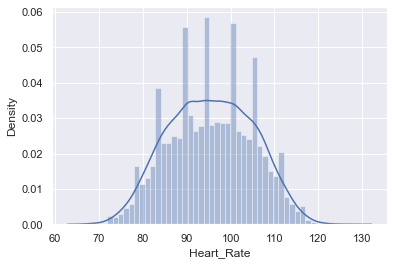

In [14]:
# PLotting distribution of 'Heart Rate' column

sns.distplot(data['Heart_Rate'])

<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

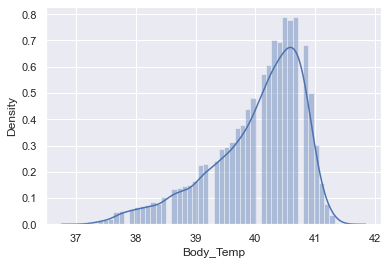

In [15]:
# PLotting distribution of 'Body Temperature' column

sns.distplot(data['Body_Temp'])

<AxesSubplot:xlabel='Calories', ylabel='Density'>

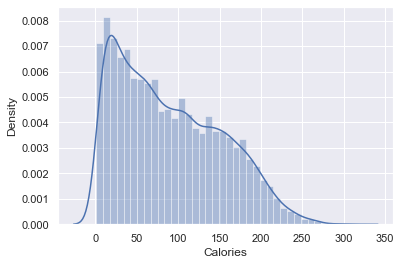

In [16]:
# PLotting distribution of 'Calories' column

sns.distplot(data['Calories'])

Finding the Correlation in the Dataset

In [17]:
correlation = data.corr()

<AxesSubplot:>

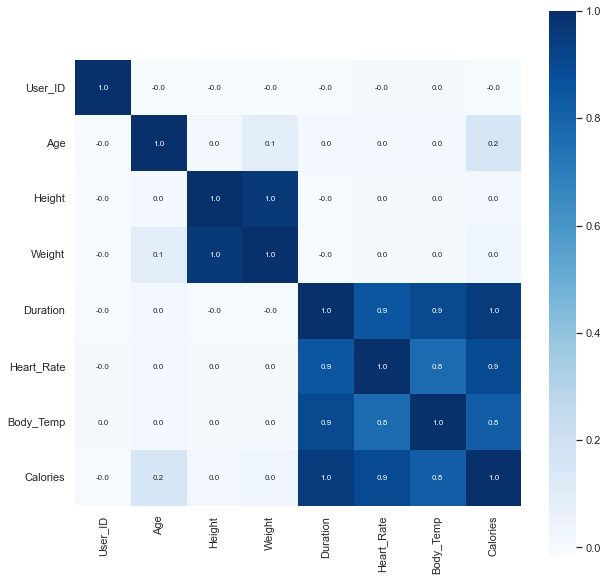

In [18]:
# Plotting a HeatMap to understand the Correlation

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Categorical Data Encoding

In [19]:
# Converting Categorical Data to Nmerical Values

data.replace({'Gender':{'male':0, 'female':1}}, inplace = True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Splitting the Data into Features & Traget

In [20]:
x = data.drop(columns = ['User_ID', 'Calories'], axis = 1)
y = data['Calories']

In [21]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [22]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting Data into Train & Test Data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [26]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor -

XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions). The training proceeds iteratively, adding new trees that predict the residuals or errors of prior trees that are then combined with previous trees to make the final prediction. It's called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

In [27]:
# Loading the model

model = XGBRegressor()

In [28]:
# Training the model on train data

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model Evaluation

Prediction on Test Data

In [29]:
test_data_predict = model.predict(x_test)
print(test_data_predict)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean Absolute Error

In [30]:
mae = metrics.mean_absolute_error(y_test, test_data_predict)
print('Mean Absolute Error :', mae)

Mean Absolute Error : 1.4807048829992613


CONCLUSION -

The magnitude of error of our model is very low. Our model should be used for prediction

Predictive System

In [33]:
input_data = (0,68,190.0,94.0,29.0,105.0 ,40.8) # Values taken after splitting data into x & y from X

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array for one sample
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print('The Calories Burnt By A Person :', prediction)

The Calories Burnt By A Person : [230.88486]
